# Homework 11
## Due date: Friday, April 29 at 11:59pm in Gradescope


#### - This assignment is worth 30 points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


from copy import copy
from time import time
%matplotlib inline

try:
    %matplotlib inline
except:
    pass

from scipy import integrate

def trapezoid_method(a,b,n,f):
    N = int(n)
    xvals = np.linspace(a,b,N+1)
    fvals = f(xvals)
    dx = (b-a)/N
    return dx/2.*(fvals[0] + fvals[N] + 2.*np.sum(fvals[1:N])) 

def simpson_method(a,b,n,f):
    N = int(n)
    xvals = np.linspace(a,b,N+1)
    fvals = f(xvals)
    dx = (b-a)/N
    return dx/3.*(fvals[0] + fvals[N] + 2.*np.sum(fvals[2:N-1:2]) + 4.*np.sum(fvals[1:N:2]))

def lfun(xvals,ii,x):
    lval = np.ones(x.size)
    n = xvals.size
    for l in range(0,n):
        if l != ii:
            lval *= (x-xvals[l])/float(xvals[ii]-xvals[l])  
    return lval

def lagrange_interp(xvals,fvals,x):
    n = fvals.size
    ipoly = np.zeros(x.size)
    for ii in range(0,n):
        ipoly += fvals[ii]*lfun(xvals,ii,x)
    return ipoly

def cheby_nodes(n):
    xcheb=np.zeros(n+1)
    for jj in range(0,n+1):
        xcheb[jj] = np.cos((2.*jj+1.)/(2.*n+2.)*np.pi)
    return xcheb

### Problem 1 (3 points)
Find the Lagrange interpolating polynomial of degree 3 that interpolates the following table of data points:
$$
\begin{array}{r|r|r}
i & x_{i} & f(x_i)\\
\hline
0 & 10 & 227.04\\
1 & 15 & 362.78\\
2 & 20 & 517.35\\
3 & 22.5 & 602.97
\end{array}
$$
You must show your work with $\LaTeX$ to get full credit. It isn't necessary to completely simplify the polynomial to the most general form of $p(x) = ax^3 + bx^2 + cx +d$ to get full credit.

### Problem 1 Solution
$$
L_{j}^{(n)}(x) = \frac{\prod_{l\neq j}^{n}(x-x_{l})}{\prod_{l\neq j}^{n}(x_{j}-x_{l})}.
$$
$L^{(3)}_{0}(x) = \frac{(x-x_{1})(x-x_{2})(x-x_{3})}{(x_{0}-x_{1})(x_{0}-x_{2})(x_{0}-x_{3})}$

$L^{(3)}_{0}(x) = \frac{(x-15)(x-20)(x-22.5)}{(10-15)(10-20)(10-22.5)}$

$L^{(3)}_{0}(x) = -\frac{x^3 - 57.5 x^2 + 1087.5 x - 6750}{625}$

.

$L^{(3)}_{1}(x) = \frac{(x-x_{0})(x-x_{2})(x-x_{3})}{(x_{1}-x_{0})(x_{1}-x_{2})(x_{1}-x_{3})}$

$L^{(3)}_{1}(x) = \frac{(x-10)(x-20)(x-22.5)}{(15-10)(15-20)(15-22.5)}$

$L^{(3)}_{1}(x) = \frac{x^3 - 52.5 x^2 + 875 x - 4500}{187.5}$

.

$L^{(3)}_{2}(x) = \frac{(x-x_{0})(x-x_{1})(x-x_{3})}{(x_{2}-x_{0})(x_{2}-x_{1})(x_{2}-x_{3})}$

$L^{(3)}_{2}(x) = \frac{(x-10)(x-15)(x-22.5)}{(20-10)(20-15)(20-22.5)}$

$L^{(3)}_{2}(x) = -\frac{x^3 - 47.5 x^2 + 712.5 x - 3375}{125}$

.

$L^{(3)}_{3}(x) = \frac{(x-x_{0})(x-x_{1})(x-x_{2})}{(x_{3}-x_{0})(x_{3}-x_{1})(x_{3}-x_{2})}$

$L^{(3)}_{3}(x) = \frac{(x-10)(x-15)(x-20)}{(22.5-10)(22.5-15)(22.5-20)}$

$L^{(3)}_{3}(x) = \frac{x^3 - 45 x^2 + 650 x - 3000}{234.375}$

. 

$p_3(x) = 227.04 * -\frac{x^3 - 57.5 x^2 + 1087.5 x - 6750}{625} + 362.78 * \frac{x^3 - 52.5 x^2 + 875 x - 4500}{187.5} + 517.35 * -\frac{x^3 - 47.5 x^2 + 712.5 x - 3375}{125} + 602.97 * \frac{x^3 - 45 x^2 + 650 x - 3000}{234.375}$


### Problem 2 (6 points): 

Let $K$ be the maximum value of $\left \lvert f^{(4)}(x)\right\rvert$ on an interval $[a,b]$, then the error bound for Simpson method $E_S$ is: 

$$E_S = \left\lvert \int_a^b f(x) \ dx - S_n  \right\rvert \leq \frac{(b-a)^5 K }{180 \ n^4}$$

Let $f(x) = \cos(x-x^2)$, 

##### (a) 

Write down an expression for $f^{(4)}(x)$ (you are **not** required to show work).  Note that $f^{(4)}(x)$ represents the fourth derivative of the function $f(x)$.

In [2]:
### (a) Solution
f4 = lambda x: (16*x^4 - 32*x^3 + 24*x^2 - 8*x - 11) * np.cos((x - 1)* x) + 12*(1 - 2*x)^2 * np.sin((x - 1)* x)

##### (b) 

Write a program to compute the maximum value of $\left \lvert f^{(4)}(x)\right\rvert$ on the interval $[0,1]$. What is the maximum value?

In [3]:
### (b) Solution
f5 = lambda x: -(1 - 2*x)*(20 *(1 - 2*x)**2 *np.cos((x - 1)*x) - (16*x**4 - 32*x**3 + 24*x**2 - 8*x - 59)*np.sin((x - 1)*x))
def bisec_method(a,b,f,tol):
    fa,fb = f(a),f(b)
    
    if fa*fb<0:
        c = (a+b)/2.
        capproxs = np.array([c])
        fc = f(c)
        while np.abs(fc)>=tol:
            if fa*fc<0:
                b = c
            else:
                a = c
          
            c = (a+b)/2.
            capproxs = np.append(capproxs,c)
            fc = f(c)
     
        print("Our root is: %1.15f" %c)
    else:
        print("Cannot ensure existence of root.")
a=0
b=1
tol = 1e-6
print(bisec_method(a,b,f5,tol))

Our root is: 0.500000000000000
None


##### (c) 

How large must the value of $n$ be in the approximation $S_n$ of $\int_0^1 f(x) \ dx$ by Simpson's rule to ensure that the absolute error is less than $10^{-4}$?

In [4]:
### (c) Solution


a=0
b=1
n=1
k=.5

def errorBound():
    return ((b-a)**5*k)/(180*n**4)
while errorBound()>1.00e-4:
    n=n+.0001
print(n)
print(format(errorBound(),'.1E'))

2.295800000000514
1.0E-04


##### (d) 

Write a program to compute the integral $\int_0^1 f(x) \ dx$  using Simpson's method with the value of $n$ obtained in part (c).

In [5]:
### (d) Solution
f = lambda x: np.cos(x-x**2)
a = 0
b = 1
n = 2.295800000000514
print(simpson_method(a,b,n,f))

0.9792749478070963


##### (e) 

Use the `quad` function from `scipy` to obtain an "exact" solution for $\int_0^1 f(x) \ dx$.

In [6]:
### (e) Solution
i = integrate.quad(f, 0, 1)
print(i)

(0.9833993553876421, 1.0917926067528972e-14)


##### (f) 

Compare the "exact" solution from part (d) to the computed solution from part (c). Does it agree with your estimates in part (c)? How many decimals of precision does your solution from (c) have?

### (f) Solution
Its close but not extremely accurate. my solution is only precise to 0.1.

### Problem 3 (6 points)

Assuming that $f(x)$ is given as follows:
$$
f(x) = \frac{7x}{2x^{2} + 1}, ~ -1 \leq x \leq 1
$$

##### (a)  

Using an equispaced set of $25$ nodes, generate the Lagrange interpolating polynomial to $f(x)$ and use it to interpolate `x = np.linspace(-1,1,2000)`. 

Generate a plot which shows how the error in your approximation varies over the interval $[-1,1]$.

[-2.33333333 -2.33429628 -2.33524211 ...  2.33524211  2.33429628
  2.33333333]


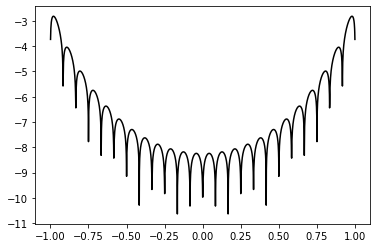

In [7]:
### (a) Solution
def lfun(xvals,jj,x):
    lval = np.ones(x.size)
    # Insert code here
    n = xvals.size
    for l in range(0,n):
        if l != jj:
            lval *= (x-xvals[l])/(xvals[jj]-xvals[l])  

    return lval

def lagran_interp(xvals,fvals,x):
    n = fvals.size
    # Insert code here 
    ipoly = np.zeros(x.size)
    for jj in range(0,n):
        ipoly += fvals[jj]*lfun(xvals,jj,x)
   
    return ipoly


f = lambda x: (7*x)/(2*x**2 + 1)

xvals = np.linspace(-1,1,25)
fvals = f(xvals)
x = np.linspace(-1,1,2000)
yinterp = lagran_interp(xvals,fvals,x)
print(yinterp)
ftrue = (7*x)/(2*x**2 + 1)

plt.plot(x,np.ma.log10(np.abs(ftrue-yinterp)),ls='-',color='k')


##### (b)

What is the degree of the Lagrange interpolating polynomial in part (a).

### (b) Solution
24th degree polynomial

##### (c)

Compare the graph of f(x) with that of the of the Lagrange interpolating polynomial from part (a) for `x = np.linspace(-1,1,2000)` by plotting both graphs on the same figure.

[-2.33333333 -2.33429628 -2.33524211 ...  2.33524211  2.33429628
  2.33333333]


Text(0, 0.5, '$f_{24}(x)$')

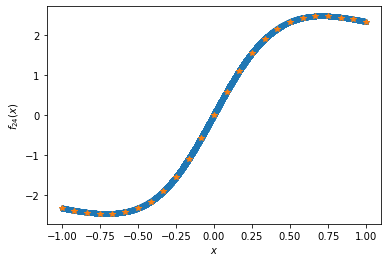

In [8]:
### (c) Solution
xvals = np.linspace(-1,1,25)
fvals = f(xvals)
x = np.linspace(-1,1,2000)
yinterp = lagran_interp(xvals,fvals,x)
print(yinterp)
plt.plot(x,yinterp,'*')
plt.plot(xvals,fvals, '*')
plt.xlabel('$x$')
plt.ylabel('$f_{24}(x)$')

##### (d)  

Using an equispaced set of $250$ nodes, generate the Lagrange interpolating polynomial to $f(x)$ and use it to interpolate `x = np.linspace(-1,1,2000)`.  
Generate a plot which shows how the error in your approximation varies over the interval.  

[-2.33333333e+00 -2.17158611e+55 -3.84996051e+55 ... -7.80123222e+53
 -2.31978049e+55  2.33333333e+00]


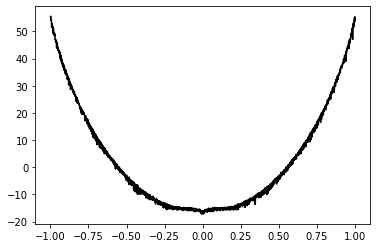

In [9]:
### (d) Solution
xvals = np.linspace(-1,1,250)
fvals = f(xvals)
x = np.linspace(-1,1,2000)
yinterp = lagran_interp(xvals,fvals,x)
print(yinterp)
ftrue = (7*x)/(2*x**2 + 1)

plt.plot(x,np.ma.log10(np.abs(ftrue-yinterp)),ls='-',color='k')

##### (e)

What is the degree of the Lagrange interpolating polynomial in part (d).

### (e) Solution
249

##### (f)

Compare the graph of f(x) with that of the Lagrange interpolating polynomial from (d) for `x = np.linspace(-1,1,2000)` by plotting both graphs on the same figure.

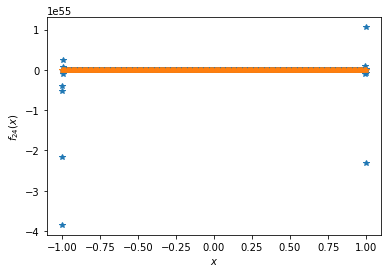

In [10]:
### (f) Solution
xvals = np.linspace(-1,1,250)
fvals = f(xvals)
x = np.linspace(-1,1,2000)
yinterp = lagran_interp(xvals,fvals,x)

plt.plot(x,yinterp,'*')
plt.plot(xvals,fvals, '*')
plt.xlabel('$x$')
plt.ylabel('$f_{24}(x)$')
plt.show()


### Problem 4 (5 points)

Assuming that $f(x)$ is given as follows:
$$
f(x) = \frac{7x}{2x^{2} + 1}, ~ -1 \leq x \leq 1
$$

##### (a)  

Using a Chebyshev-spaced set of $25$ nodes, generate the Lagrange interpolating polynomial to $f(x)$ and use it to interpolate `x = np.linspace(-1,1,2000)`. 

Generate a plot which shows how the error in your approximation varies over the interval $[-1,1]$ as presented in the video.

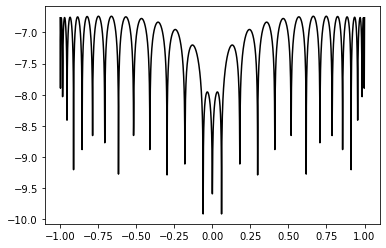

In [11]:
def cheby_nodes(n):
    xcheb=np.zeros(n+1)
    for jj in range(0,n+1):
        xcheb[jj] = np.cos((2.*jj+1.)/(2.*n+2.)*np.pi)
    return xcheb

### (a) Solution

f = lambda x: (7*x)/(2*x**2 + 1)

x = np.linspace(-1,1,2000)
xcheb = cheby_nodes(25)
fcheb = f(xcheb)
finterp = lagran_interp(xcheb,fcheb,x)
ftrue = (7*x)/(2*x**2 + 1)

plt.plot(x,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

##### (b)

Compare the graph of f(x) with that of the Lagrange interpolating polynomial from (a) for `x = np.linspace(-1,1,2000)` by plotting both graphs on the same figure.

Text(0, 0.5, '$f_{24}(x)$')

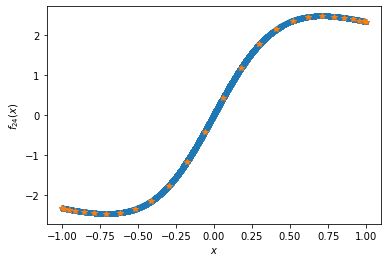

In [12]:
### (b) Solution
x = np.linspace(-1,1,2000)
xcheb = cheby_nodes(25)
fcheb = f(xcheb)
finterp = lagran_interp(xcheb,fcheb,x)

plt.plot(x,finterp,'*')
plt.plot(xcheb,fcheb, '*')
plt.xlabel('$x$')
plt.ylabel('$f_{24}(x)$')

##### (c)

Using `non-equispaced` set of $250$ nodes, generate the Lagrange interpolating polynomial to $f(x)$ and use it to interpolate `x = np.linspace(-1,1,2000)`.  
Generate a plot which shows how the error in your approximation varies over the interval.  

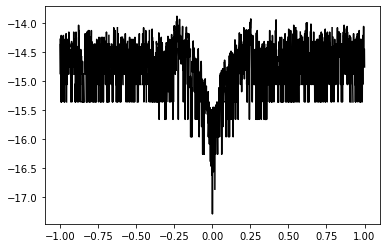

In [13]:
# (c) Solution
x = np.linspace(-1,1,2000)
xcheb = cheby_nodes(250)
fcheb = f(xcheb)
finterp = lagran_interp(xcheb,fcheb,x)
ftrue = (7*x)/(2*x**2 + 1)

plt.plot(x,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

##### (d)

Compare the graph of $f(x)$ with that of the Lagrange interpolating polynomial from (c) for `x = np.linspace(-1,1,2000)` by plotting both graphs on the same figure.

Text(0, 0.5, '$f_{24}(x)$')

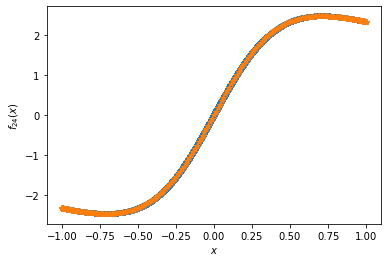

In [14]:
# (d) Solution
x = np.linspace(-1,1,2000)
xcheb = cheby_nodes(250)
fcheb = f(xcheb)
finterp = lagran_interp(xcheb,fcheb,x)

plt.plot(x,finterp,'*')
plt.plot(xcheb,fcheb, '*')
plt.xlabel('$x$')
plt.ylabel('$f_{24}(x)$')

##### (e)

Compare your results from Problem 4 to Problem 3. Explain your findings.

### (e) Solution
both of the estimations were good with 25 points, but when incresed to 250 points, the equally spaced points had much more error, whereas the chevychev points were and even better approximation. This is likely due to Runge's phenomenon.

### Problem 5 (6 points)

The Hermite polynomials $H_{n}(x)$ are defined such that $H_{0}(x)=1$, $H_{1}(x)=2x$, and for $n\geq2$, $H_{n}(x)$ satisfies the recurrence relationship

$$
H_{n}(x) = 2xH_{n-1}(x) -2(n-1)H_{n-2}(x), ~ n\geq 2. 
$$

##### (a) 

Write a recursive program to find any Hermite polynomial $H_{n}(x)$. 

In [15]:
### (a) Solution 
def herm(n,x):
    if n >= 2:
        return 2*x*herm(n-1,x) - 2*(n-1)*herm(n-2,x)
    elif n == 1:
        return 2*x
    else:
        return 1


##### (b) 

Generate a plot of the first six Hermite polyonmials on the interval $-3\leq x \leq 3$.  Your figure should be labeled, have a legend, and different colors should be used to distinguish the different Hermite polynmials in the plot. Also be sure to restrict the $y$ limits of the plot to get a better sense of the shape of each polynomial. 

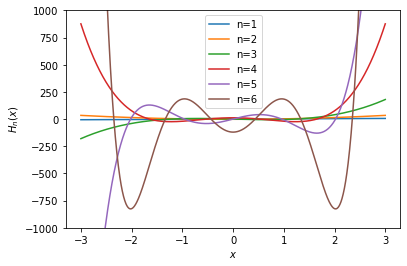

In [16]:
### (b) Solution
xvals = np.linspace(-3,3,1000)
n = 1
while n <= 6:
    yvals = [herm(n,x) for x in xvals]
    plt.plot(xvals,yvals)
    n = n+1
plt.ylim([-1000, 1000])
plt.xlabel('$x$')
plt.ylabel('$H_{n}(x)$')
plt.legend(['n=1','n=2','n=3','n=4','n=5','n=6'])
plt.show()


### Problem 6 (4 points)

Develop quadratic splines for the following data points in the following table.

$$
\begin{array}{r|r|r}
i & x_{i} & f(x_i)\\
\hline
0 & -1.00 & -1.0000 \\
1 & -0.65 & 0.3860 \\
2 & 0.10 & 0.4802 \\
3 & 0.40 & 0.8838 \\
4 & 1.00 & 1.0000
\end{array}
$$
Using quadratic splines, estimate the value of $f(-0.3)$.

You must show your work to get full credit, that means deriving the coefficients of the system that needs to be solved.

### Problem 6 Solution
The 3$n$ (i.e. 12 equations ) are:

At end points:
$$a_1(-1)^2 + b_1 (-1) + c_1 = -1$$
$$a_4(1)^2 + b_4 (1) + c_4 = 1$$

At interior points:
$$a_1(-.65)^2 + b_1 (-.65) + c_1 = .386$$
$$a_2(-.65)^2 + b_2 (-.65) + c_2 = .386$$
$$a_2(.1)^2 + b_2 (.1) + c_2 = .4802$$
$$a_3(.1)^2 + b_3 (.1) + c_3 = .4802$$
$$a_3(.4)^2 + b_3 (.4) + c_3 = .8838$$
$$a_4(.4)^2 + b_4 (.4) + c_4 = .8838$$

Derivatives at interior points:
$$2a_1(-.65) + b_1 = 2a_2(-.65) + b_2$$
$$2a_2(.1) + b_2 = 2a_3(.1) + b_3$$
$$2a_3(.4) + b_3 = 2a_4(.4) + b_4$$

Choosing the first spline to be linear:
$$a_1 = 0$$

In [17]:
A = np.array([[-1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0], 
              [ 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 ], 
              [-.65 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 ],
              [0 , 0 , .4225 , -.65 , 1 , 0 , 0 , 0 , 0 , 0 , 0],
              [0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0],
              [0 , 0 , 0 , 0 , 0 , 1, 1 , 1 , 0 , 0 , 0],
              [0 , 0 , 0 , 0 , 0 , .16 , .4 , 1 , 0 , 0 , 0],
              [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , .16 , .4 , 1],
              [1 , 0 , 1.3 , -1 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
              [0 , 0 , 2 , 1 , 0 , -2 , -1 , 0 , 0 , 0 , 0],
              [0 , 0 , 0 , 0 , 0 , 8 , 1 , 0 , -8 , -1 , 0 ]])

b = np.array([ -1, 1, .386 , .386 , .4802 , .4802 , .8838 , .8838 , 0 , 0 ,0])
x = np.linalg.solve(A,b)

print(x)

[ 3.96        2.96       -2.36539945  0.88498072  1.96061873 -5.28858586
  6.73135354 -0.96256768 -5.41984848  7.78145455 -1.36160606]


Since the equation of the splines are:

$$f(x) = a_1 x^2 + b_1 x + c_1 $$
$$f(x) = a_2 x^2 + b_2 x + c_2 $$
$$f(x) = a_3 x^2 + b_3 x + c_3 $$
$$f(x) = a_4 x^2 + b_4 x + c_4 $$

We obtain, after plugging in the coefficients above that, the following expressions are for the equations of the splines:
$$f(x) =  3.96 x + 2.96 $$
$$f(x) =  -2.36539945x^2 +  0.88498072x + 1.96061873 $$
$$f(x) = -5.28858586 x^2 + 6.73135354 x -0.96256768 $$
$$f(x) = -5.41984848 x^2 + 7.78145455 x -1.36160606 $$

Therefore 
$$f(-.03) = -2.36539945(-.03)^2 +  0.88498072(-.03) + 1.96061873  = 1.93194$$
